In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model
import os
import cv2 as cv
import imghdr
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'sklearn'

In [68]:
!pip install scikit-learn

In [6]:
# config to compute with GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
# check compute with GPU
tf.config.list_physical_devices('GPU')

[]

In [8]:
# data directory
data_dir = 'data'
# list of image exetension
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
# remove image if that image unreadable or have exetension not in image_exts
os.chdir("/Users/Nonbangkok/Documents/VS_code/CAI_Camp/PoleSign/Base")
for image_class in os.listdir(data_dir):
    if image_class == ".DS_Store":
        continue
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                # os.remove(image_path)
        except Exception as e: 
            print(f'Issue with image {image_path} :: {e}')
            # os.remove(image_path)

In [10]:
# load data
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 323 files belonging to 4 classes.


In [11]:
# Scaled the batch
data = data.map(lambda x, y : (x / 255, y))

In [12]:
# Separate the size of data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1
print(train_size,val_size,test_size,train_size+val_size+test_size)
print(len(data))

7 2 2 11
11


In [13]:
# Separate the data
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)
print(len(train),len(val),len(test))

7 2 2


In [27]:
# Initial model
model = Sequential()

In [28]:
# Create neural
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [29]:
# Initial optimizer, loss function, metrics
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [30]:
# Summary the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,396 (14.10 MB)

 Trainable params: 3,697,396 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Log directory
logdir = 'logs'

In [32]:
# Initial the callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
# Train the model and collect history
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 324ms/step - accuracy: 0.3032 - loss: 2.4030 - val_accuracy: 0.3750 - val_loss: 1.2830
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 305ms/step - accuracy: 0.4158 - loss: 1.2809 - val_accuracy: 0.4375 - val_loss: 1.1977
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 319ms/step - accuracy: 0.3676 - loss: 1.2813 - val_accuracy: 0.2812 - val_loss: 1.2817
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 313ms/step - accuracy: 0.3900 - loss: 1.1837 - val_accuracy: 0.5469 - val_loss: 1.1345
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 306ms/step - accuracy: 0.5296 - loss: 1.1283 - val_accuracy: 0.6562 - val_loss: 0.9239
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 340ms/step - accuracy: 0.5569 - loss: 1.0150 - val_accuracy: 0.6250 - val_loss: 0.9513
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 333ms/step - accuracy: 0.6024 - loss: 0.9570 - val_accuracy: 0.5938 - val_loss: 0.8459
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 315ms/step - accuracy: 0.6075 - loss: 0.8657 - val_accuracy: 0.6562 - val_loss:

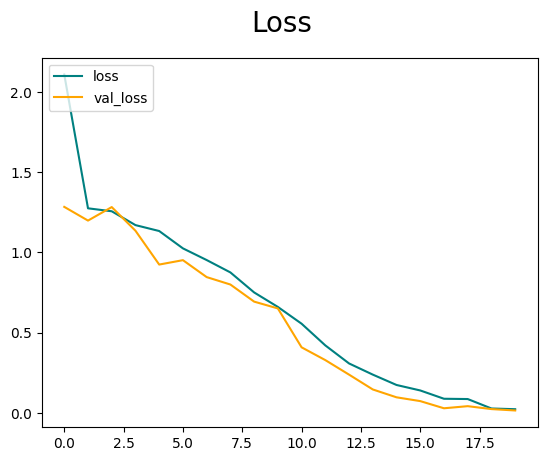

In [34]:
# Plot the loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show() 

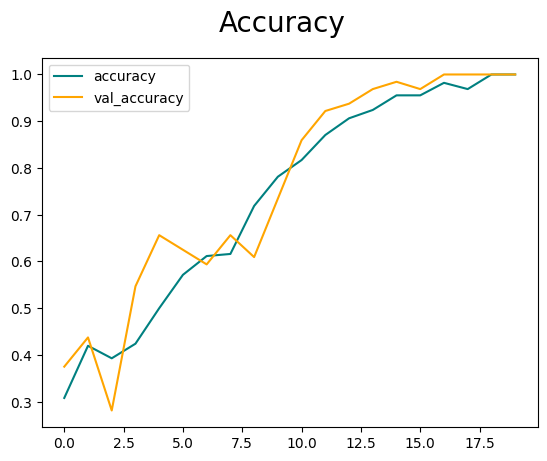

In [35]:
# Plot the accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [38]:
# Initial the evaluation
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [58]:
# Evaluation 
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    yhat = np.argmax(yhat,axis=1)
    print(f"y shape: {y.shape}, yhat shape: {yhat.shape}")
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
y shape: (32,), yhat shape: (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
y shape: (3,), yhat shape: (3,)


2024-09-25 18:27:42.124020: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [50]:
print(f"Precision: {pre.result().numpy()}, Recall: {re.result().nump
y()}, Accuracy: {acc.result().numpy()}")

Precision: 1.0, Recall: 1.0, Accuracy: 0.5523809790611267


In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(test_labels, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


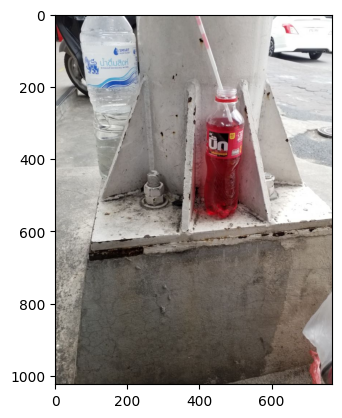

[[0.5542035  0.23617971 0.20504248 0.0045743 ]]
P1


In [56]:
img = cv.imread("P3.jpg")
resize = tf.image.resize(img, (256,256))
yhat = model.predict(np.expand_dims(resize/255, 0))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
print(yhat)
print(f"P{np.argmax(yhat)+1}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


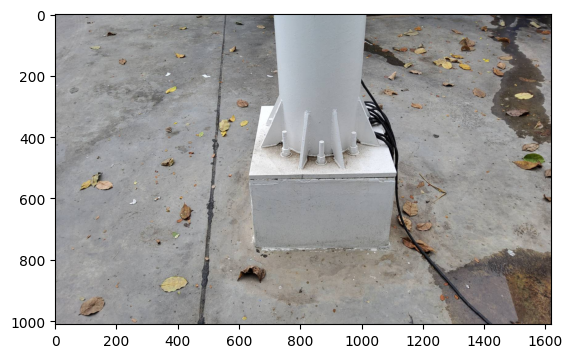

[[2.9849866e-04 9.0160513e-01 5.1458110e-03 9.2950642e-02]]
P2


In [55]:
img = cv.imread("P4.jpg")
resize = tf.image.resize(img, (256,256))
yhat = model.predict(np.expand_dims(resize/255, 0))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
print(yhat)
print(f"P{np.argmax(yhat)+1}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


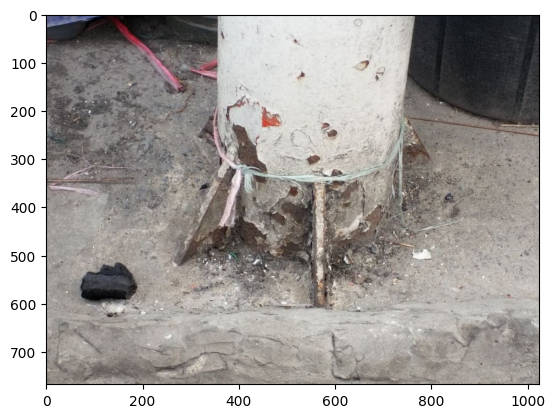

[[9.9982136e-01 3.5220566e-08 1.7861824e-04 7.7521975e-11]]
P1


In [57]:
img = cv.imread("P1.jpg")
resize = tf.image.resize(img, (256,256))
yhat = model.predict(np.expand_dims(resize/255, 0))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
print(yhat)
print(f"P{np.argmax(yhat)+1}")

In [ ]:
model.save('Base.h5')